In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.text import Text

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [ ]:
##importing data

In [2]:
df = pd.read_csv('Twitter Hate Speech.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [ ]:
##data information 

In [5]:
print(f'number of observation:{df.shape[0]}')
print(f'number of features:{df.shape[1]}')

number of observation:31962
number of features:3


In [6]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
df.size

95886

In [10]:
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [11]:
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [12]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [13]:
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


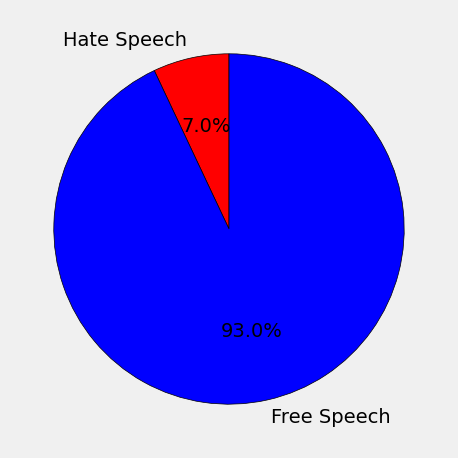

In [15]:
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = False, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'blue'])

plt.tight_layout()
plt.show()

In [ ]:
##cleaning the text

In [16]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

In [17]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

In [18]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

In [19]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

In [21]:
def remove_urls(text):
    """Remove URLs from a text string."""
    return re.sub(r"http\S+", "", text)

df['tweet'] = df['tweet'].apply(remove_urls)